In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from pylab import rcParams

In [2]:
data = pd.read_csv("/Users/cestdrama/Desktop/yelp_feature.csv")

##### dataset shape

In [3]:
data.shape

(1048575, 22)

###### Sample of our dataset

In [4]:
data.head()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite_count,fans,friends_count,funny,review_count,useful,business_average_stars,stars,star_Diff
0,4.03,1,0,1,2,0,0,1,0,1,...,25,3,5,99,17,95,84,3.857143,4.000000,0.142857
1,3.63,1,0,1,1,0,0,0,0,0,...,16,0,4,1152,22,33,48,3.976190,3.666667,0.309524
2,3.71,0,0,0,0,0,0,1,0,0,...,10,0,0,15,8,16,28,3.794118,3.705882,0.088235
3,4.85,0,0,0,1,0,0,0,0,2,...,14,0,5,525,4,17,30,4.000000,5.000000,1.000000
4,4.08,80,0,80,28,1,1,16,5,57,...,665,4,39,231,279,361,1114,4.076923,4.692308,0.615385


##### check if there any null value in the dataset

In [31]:
data.isnull().values.any()

False

##### data describe

In [5]:
data.stars.describe()

count    1.048575e+06
mean     3.678650e+00
std      1.320701e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: stars, dtype: float64

##### Histogram of our dataset

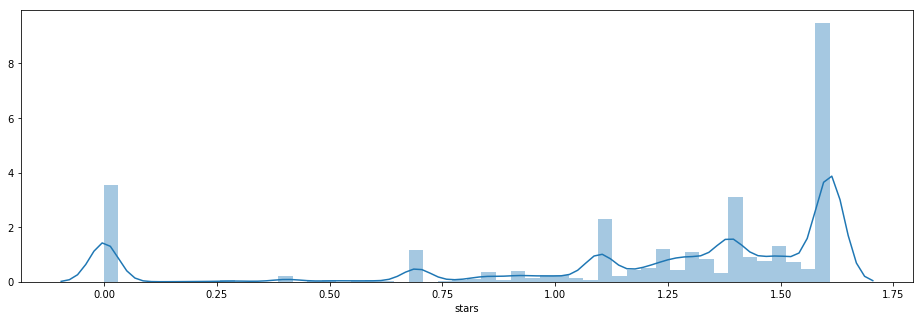

In [7]:
target = np.log(data.stars)
plt.figure(figsize = (16,5))
sns.distplot(target)

##### features observing

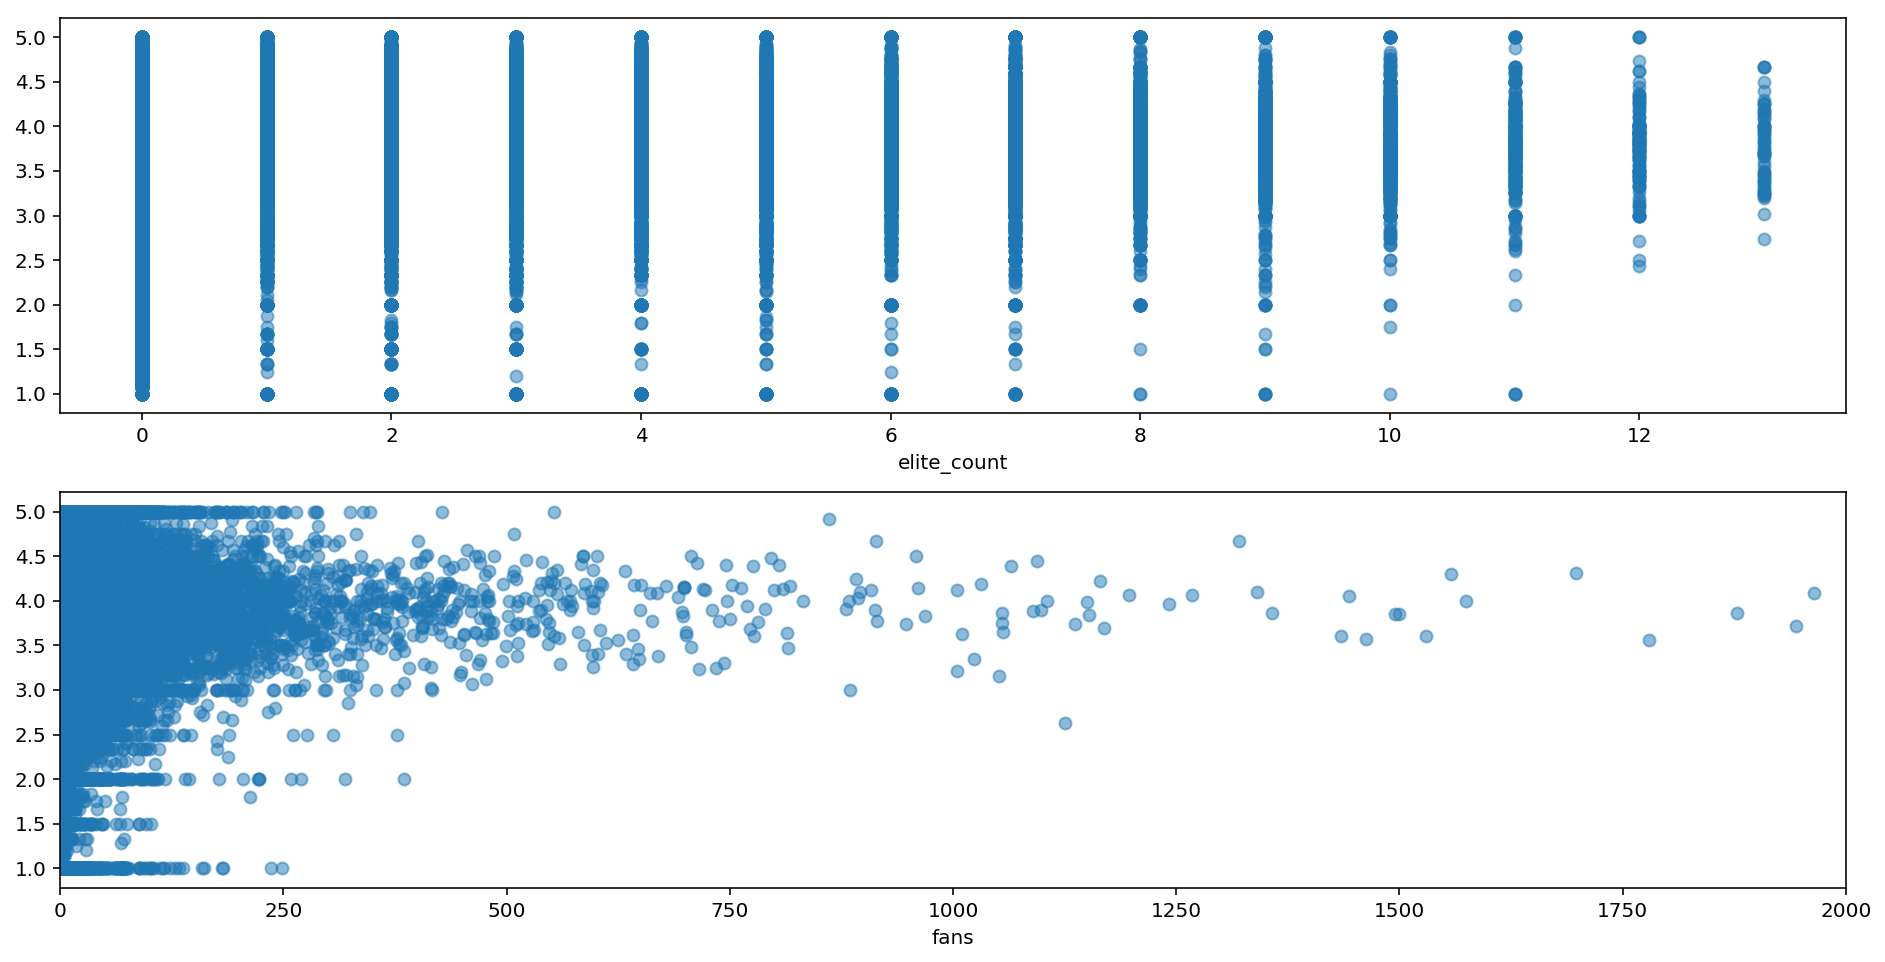

In [8]:

%config InlineBackend.figure_format = 'retina'
#size 
plt.figure(figsize=(16, 8))
#draw
plt.subplot(2, 1, 1)
plt.xlabel('elite_count')
plt.scatter(data['elite_count'], data['stars'], alpha=0.5)
plt.subplot(2, 1, 2)
plt.xlim(0,2000)
plt.xlabel('fans')
plt.scatter(data['fans'], data['stars'], alpha=0.5)
plt.show()

#### Correlation  matrix  and Heapmap

In [9]:
header=data.columns.values.tolist()
print(header)
print(len(header))

['average_stars', 'compliment_cool', 'compliment_cute', 'compliment_funny', 'compliment_hot', 'compliment_list', 'compliment_more', 'compliment_note', 'compliment_photos', 'compliment_plain', 'compliment_profile', 'compliment_writer', 'cool', 'elite_count', 'fans', 'friends_count', 'funny', 'review_count', 'useful', 'business_average_stars', 'stars', 'star_Diff']
22


<Figure size 432x288 with 0 Axes>

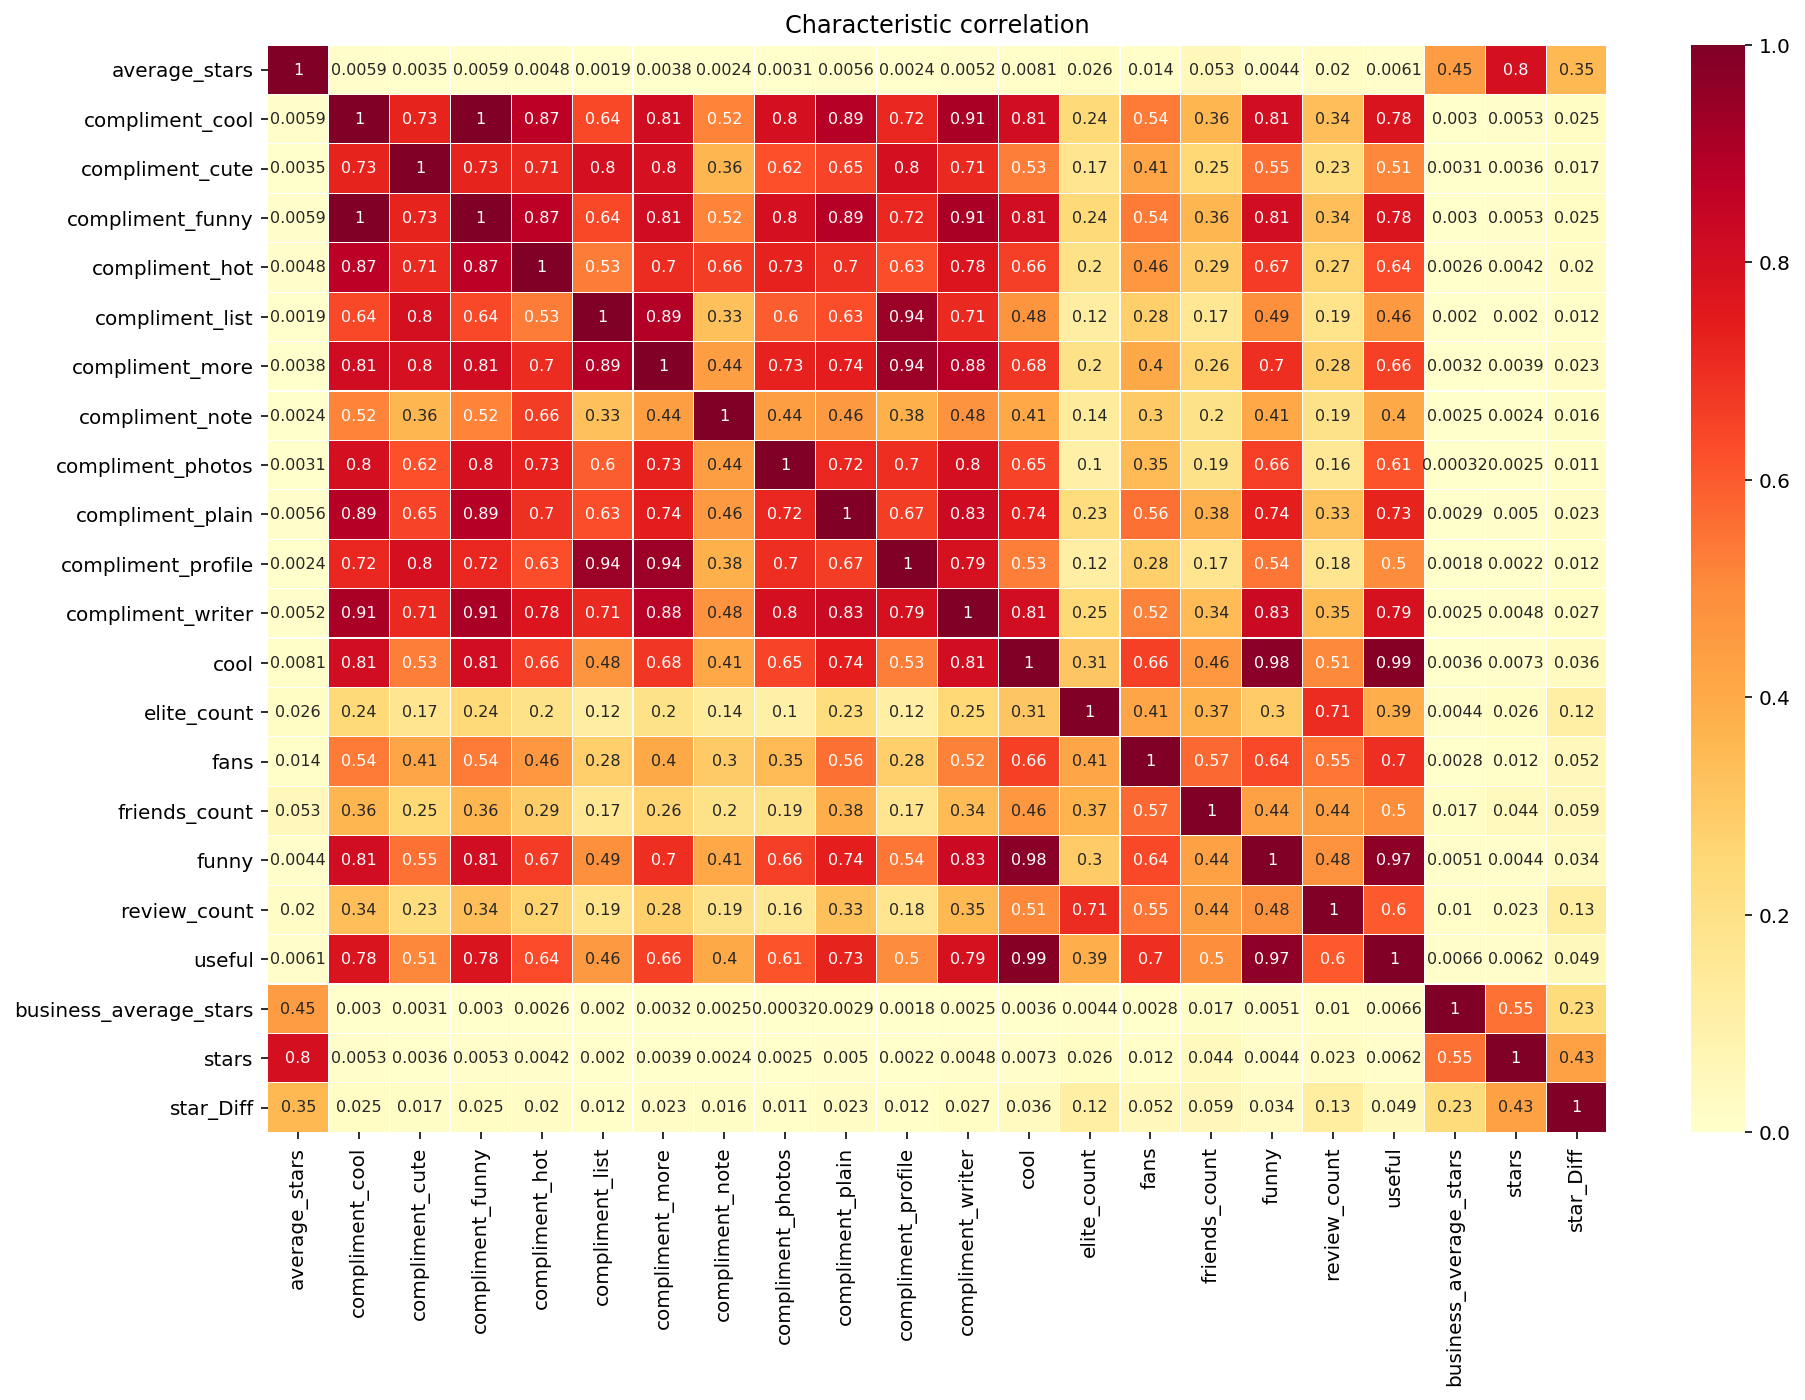

<Figure size 3600x1440 with 0 Axes>

In [32]:
matplotlib.use('TkAgg')

correlations = data.corr() 
correction=abs(correlations)

fig = plt.figure() 
ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(correction,cmap='YlOrRd', linewidths=0.05,vmax=1, vmin=0 ,annot=True,annot_kws={'size':8})
plt.xticks(np.arange(22)+0.5,header) 
plt.yticks(np.arange(22)+0.5,header) 
ax.set_title('Characteristic correlation')
plt.savefig('cluster.png',dpi=300)
plt.figure(figsize=(50,20))
plt.show()

##### correction to stars

In [30]:
print(correction["stars"].sort_values(ascending=True))

compliment_list           0.002005
compliment_profile        0.002208
compliment_note           0.002406
compliment_photos         0.002518
compliment_cute           0.003551
compliment_more           0.003893
compliment_hot            0.004202
funny                     0.004449
compliment_writer         0.004830
compliment_plain          0.005035
compliment_cool           0.005336
compliment_funny          0.005336
useful                    0.006222
cool                      0.007256
fans                      0.012243
review_count              0.022514
elite_count               0.025770
friends_count             0.043602
star_Diff                 0.430907
business_average_stars    0.553270
average_stars             0.803174
stars                     1.000000
Name: stars, dtype: float64
